In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import Analysis, sort_plays_by_result

In [7]:
analysis = Analysis(basepath=basepath)

In [8]:
analysis.load_data()

In [9]:
analysis.load_weeks(1)

In [10]:
analysis.weeks.keys()

dict_keys(['week1'])

In [11]:
analysis.process_games()

In [12]:
analysis.process_teams(teams=['IND'])

IND - week1


/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:262: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/

In [13]:
plays = analysis.return_plays(target_coverage='man')

In [14]:
len(plays)

6

In [15]:
sorted_plays = sort_plays_by_result(plays)

In [16]:
len(sorted_plays['completed'])

3

In [17]:
len(sorted_plays['incompleted'])

3

In [18]:
len(sorted_plays['intercepted'])

0

In [19]:
len(sorted_plays['other'])

0

In [20]:
def pid_lock_tracking(self, db, start='ball_snap', end='pass_arrived'):
    if isinstance(start,str):
        start = self.events[start]
        
    if isinstance(end,str):
        if end in self.events:
            end = self.events[end] + 1
        else:
            end = self.events[play.outcome_event] + 1
        
    dt = .1
    
    init_dx, init_dy, init_r = db.distance_to_lock(start - 1)
    
    p = 0
    i = 0
    d = 0
    
    p_vals = []
    i_vals = []
    d_vals = []
    
    last_p = init_r
    
    for frame in range(start, end):
        dx,dy,r = db.distance_to_lock(frame)
        
        p = r
        i += r * dt
        d = (p - last_p) / dt
        
        p_vals.append(p)
        i_vals.append(i)
        d_vals.append(d)
        
        last_p = p
        
    return p_vals, i_vals, d_vals

In [63]:
play = plays[2]

In [64]:
play.play_data

gameId                                                           2018090902
playId                                                                 1697
playDescription           (2:00) (Shotgun) A.Dalton pass incomplete deep...
quarter                                                                   2
down                                                                      1
yardsToGo                                                                10
possessionTeam                                                          CIN
playType                                                  play_type_unknown
yardlineSide                                                            IND
yardlineNumber                                                           39
offenseFormation                                                      EMPTY
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         5
numberOfPass

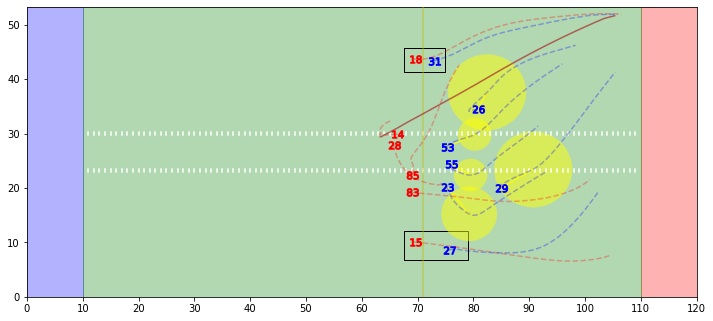

In [65]:
play.plot_play(markers='number', show_coverage=True)

In [66]:
db = play.man_responsible_dbacks[0]

In [67]:
db.number

31

In [68]:
rc = db.locks[0]

In [69]:
rc.number

18

In [70]:
play.events

{'ball_snap': 11,
 'pass_forward': 35,
 'pass_arrived': 61,
 'pass_outcome_incomplete': 63,
 'peak_dropback': 22,
 'end_dropback': 28}

In [71]:
play.outcome_event

'pass_outcome_incomplete'

## Total Route

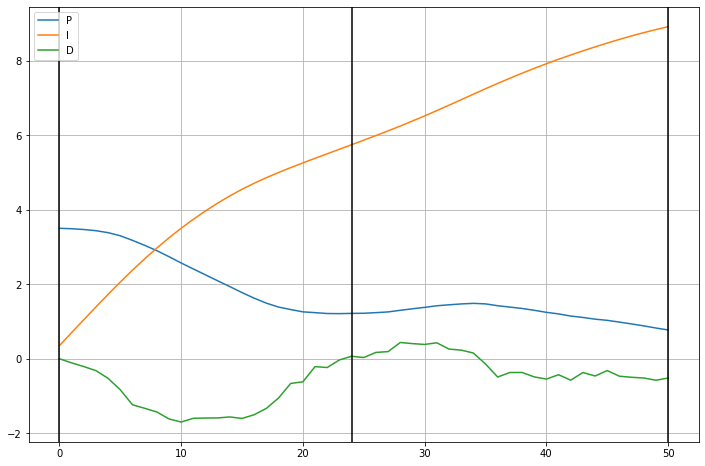

In [72]:
p, i, d = pid_lock_tracking(play, db)

fig,ax = plt.subplots(figsize=(12,8))

ax.plot(p)
ax.plot(i)
ax.plot(d)

ax.grid()
ax.legend(['P','I','D'])

for _event in ('ball_snap','pass_forward','pass_arrived'):
    try:
        ax.axvline(play.events[_event] - play.events['ball_snap'], color='k')
    except:
        ax.axvline(play.events[play.outcome_event] - play.events['ball_snap'], color='k')
        continue

plt.show()

## Pre Pass

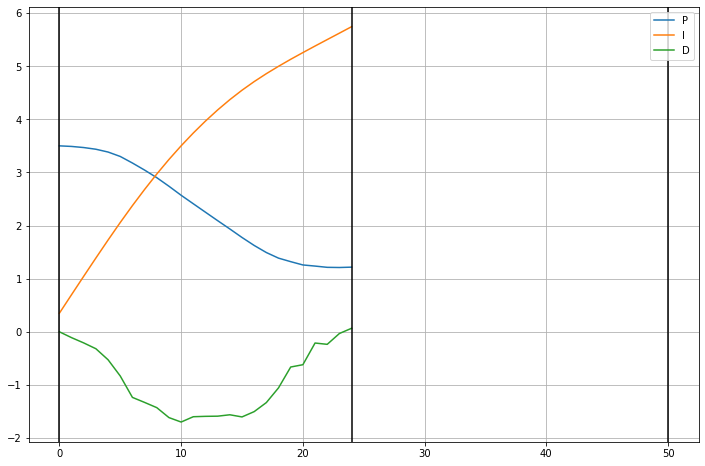

In [73]:
p, i, d = pid_lock_tracking(play, db, end='pass_forward')

fig,ax = plt.subplots(figsize=(12,8))

ax.plot(p)
ax.plot(i)
ax.plot(d)

ax.grid()
ax.legend(['P','I','D'])

for _event in ('ball_snap','pass_forward','pass_arrived'):
    try:
        ax.axvline(play.events[_event] - play.events['ball_snap'], color='k')
    except:
        ax.axvline(play.events[play.outcome_event] - play.events['ball_snap'], color='k')
        continue

plt.show()

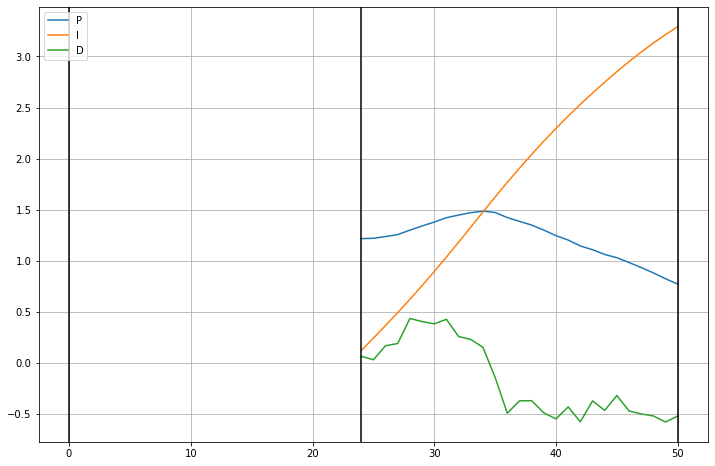

In [74]:
p, i, d = pid_lock_tracking(play, db, start='pass_forward')

fig,ax = plt.subplots(figsize=(12,8))

try:
    x = np.arange(play.events['pass_forward'],play.events['pass_arrived']+1) - play.events['ball_snap']
except:
    x = np.arange(play.events['pass_forward'],play.events[play.outcome_event]+1) - play.events['ball_snap']
    
ax.plot(x,p)
ax.plot(x,i)
ax.plot(x,d)

ax.grid()
ax.legend(['P','I','D'])

for _event in ('ball_snap','pass_forward','pass_arrived'):
    try:
        ax.axvline(play.events[_event] - play.events['ball_snap'], color='k')
    except:
        ax.axvline(play.events[play.outcome_event] - play.events['ball_snap'], color='k')
        continue

plt.show()